In [23]:
!pip install --upgrade imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25862 sha256=8a056ff551d0b6ee49a3c3d7e5d9e61d023c0fc1c45ab502fb58fffe11e24146
  Stored in directory: c:\users\yousef\appdata\local\pip\cache\wheels\59\1b\52\0dea905f8278d5514dc4d0be5e251967f8681670cadd3dca89
Successfully built imutils


In [24]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imutils

%matplotlib inline

{24: 1465, 80: 1570, 190: 1653, 319: 1712, 449: 1751, 580: 1770, 711: 1770, 845: 1749, 982: 1708, 1121: 1647, 1263: 1563, 1411: 1456, 1566: 1324, 1723: 1168, 1861: 977} dict_keys([24, 80, 190, 319, 449, 580, 711, 845, 982, 1121, 1263, 1411, 1566, 1723, 1861]) dict_values([1465, 1570, 1653, 1712, 1751, 1770, 1770, 1749, 1708, 1647, 1563, 1456, 1324, 1168, 977])


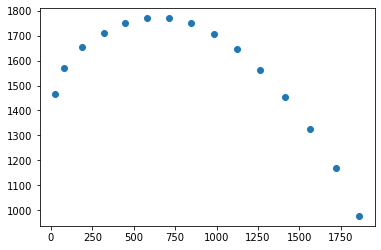

In [71]:
video_source = '../DATA/DATA Point 21.mp4'

capture = cv2.VideoCapture(video_source)
points = {}

while capture.isOpened():
    
    ret, frame = capture.read()
    
    if not ret:
        break
        
#     frame = cv2.copyMakeBorder(
#                  frame, 
#                  1000, 
#                  1000, 
#                  1000, 
#                  1000, 
#                  cv2.BORDER_CONSTANT, 
#                  value=(255, 255, 255)
#               )
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY_INV)[1]
    
    contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    
 
    for countour in contours:
        if cv2.contourArea(countour) > 500:
            # compute the center of the contour
            moments = cv2.moments(countour)
            if moments["m00"] != 0:
                cX = int(moments["m10"] / moments["m00"])
                cY = int(moments["m01"] / moments["m00"])
            else:
                cX, cY = 0, 0
            points[cX] = frame.shape[1] - cY
#             print(cX, cY, cv2.contourArea(countour))
            # draw the contour and center of the shape on the image
            cv2.drawContours(frame, [countour], -1, (0, 255, 0), 2)
            cv2.circle(frame, (cX, cY), 7, (255, 255, 255), -1)
            cv2.putText(frame, "center", (cX - 20, cY - 20),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    
#     cv2.imshow("Ball Detection", frame)
#     plt.imshow(frame)
#     plt.show()
    
    key = cv2.waitKey(1) # Maybe 25 if using a file source
    
    
    if key == 27: #Esc key
        break
        
capture.release()
cv2.destroyAllWindows()
print(points, points.keys(), points.values())
plt.scatter(points.keys(), points.values())
plt.show()